In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore
from tensorflow.keras.models import load_model,Sequential  # type: ignore
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten  # type: ignore
from tensorflow.keras.preprocessing import image  # type: ignore
import matplotlib.pyplot as plt

c:\Users\Aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def plot_history(history):
    """
    Plot the training and validation accuracy and loss curves.
    """
    # Retrieve training metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Show plots
    plt.tight_layout()
    plt.show()

In [3]:
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define image dimensions and batch size
image_height, image_width = 224, 224
batch_size = 64

In [4]:
# Path to the dataset directories
train_dir = r'ttrain'
test_dir = r'validation'

In [5]:
# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [6]:
# Data preprocessing for testing data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Load and prepare training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',  # binary labels (pothole vs. not pothole)
    classes=['potholes', 'not_potholes']  # specify the class names
)

# Load and prepare testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',  # binary labels (pothole vs. not pothole)
    classes=['potholes', 'not_potholes']  # specify the class names
)

Found 768 images belonging to 2 classes.


Found 198 images belonging to 2 classes.


In [8]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
 
    Dense(120, activation='relu'),

    Dense(1, activation='sigmoid')
])

In [9]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 120)               1

In [11]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
12/12 [==============================] - 23s 2s/step - loss: 0.6511 - accuracy: 0.6029 - val_loss: 0.6034 - val_accuracy: 0.5859
Epoch 2/10
12/12 [==============================] - 18s 1s/step - loss: 0.5441 - accuracy: 0.7578 - val_loss: 0.4153 - val_accuracy: 0.8687
Epoch 3/10
12/12 [==============================] - 17s 1s/step - loss: 0.4521 - accuracy: 0.8203 - val_loss: 0.2861 - val_accuracy: 0.9394
Epoch 4/10
12/12 [==============================] - 16s 1s/step - loss: 0.4074 - accuracy: 0.8438 - val_loss: 0.2518 - val_accuracy: 0.9141
Epoch 5/10
12/12 [==============================] - 17s 1s/step - loss: 0.3539 - accuracy: 0.8633 - val_loss: 0.2204 - val_accuracy: 0.9192
Epoch 6/10
12/12 [==============================] - 17s 1s/step - loss: 0.3356 - accuracy: 0.8698 - val_loss: 0.2251 - val_accuracy: 0.9192
Epoch 7/10
12/12 [==============================] - 23s 2s/step - loss: 0.3074 - accuracy: 0.8815 - val_loss: 0.1421 - val_accuracy: 0.9646
Epoch 8/10
12/12 [==

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

4/4 [==============================] - 1s 355ms/step - loss: 0.0971 - accuracy: 0.9747
Test Accuracy: 0.9747474789619446


In [13]:
# Save the trained model
model.save('pothole_detection_model.h5')

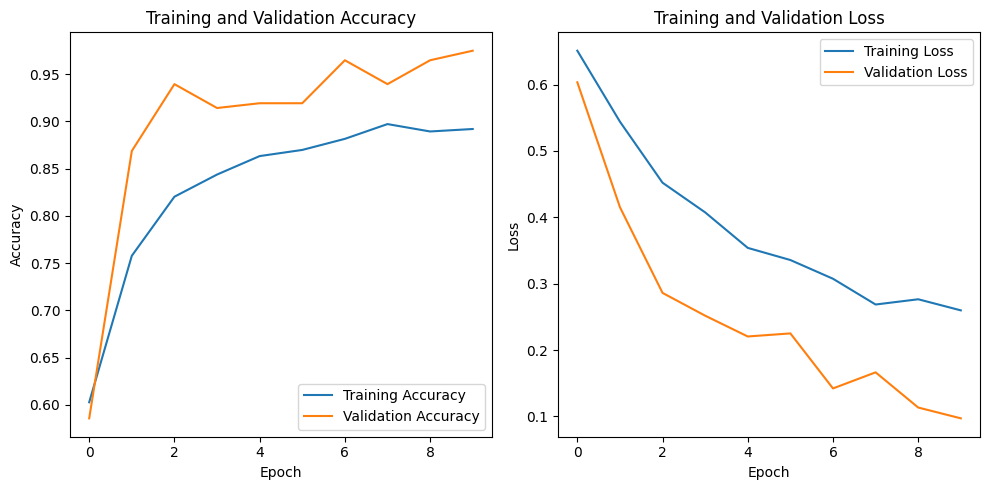

In [14]:
# Plot the performance curves
plot_history(history)